# Linear Regression (OLS)

### Key Equation: $Ax =b ~~ \text{for} ~~ n \times p+1 $


Linear regression - Ordinary Least Square (OLS) is the most basic form of supervised learning. In this we have a target variable (y) and we want to establish a linear relationship with a set of features (x<sub>1</sub>, x<sub>2</sub>, x<sub>3</sub>, ...)

Lets take a simple example to illustrate this problem:

We have price ('000 INR) and mileage (kmpl) for 7 hatchback cars as below

```
price = [199 , 248 , 302 , 363 , 418 , 462 , 523 ]
kmpl  = [23.9, 22.7, 21.1, 20.5, 19.8, 20.4, 18.6]
```

We want to predict the target variable `price`, given the input variable `kmpl`

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
price = np.array([199, 248, 302, 363, 418, 462, 523])

In [4]:
kmpl = np.array([23.9, 22.7, 21.1, 20.5, 19.8, 20.4, 18.6])

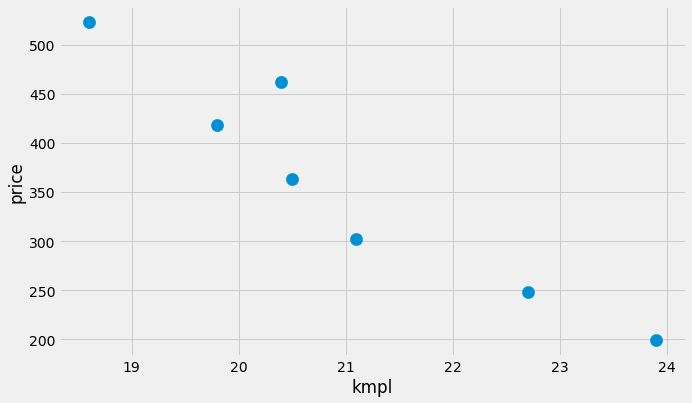

In [5]:
plt.scatter(kmpl, price, s = 150)
plt.xlabel('kmpl')
plt.ylabel('price')

## Thinking Linear Algebra Way

The basic problem in linear regression is solving - `n` linear equation, with `p` unknowns, where `p < n`

So a linear relationship can be written as:

$$ price = \beta_{0} + \beta_{1} kmpl $$

We have added an intercept to the equation, so that the line does not need to pass through zero

So we are trying to solve these n = 7 equations with, p = 2

$$ 199 = \beta_{0} + \beta_{1} 23.9 ~~~~ \text{(eq 1)} $$
$$ 248 = \beta_{0} + \beta_{1} 22.7 ~~~~ \text{(eq 2)} $$
$$ 302 = \beta_{0} + \beta_{1} 21.1 ~~~~ \text{(eq 3)} $$
$$ 363 = \beta_{0} + \beta_{1} 20.5 ~~~~ \text{(eq 4)} $$
$$ 418 = \beta_{0} + \beta_{1} 19.8 ~~~~ \text{(eq 5)} $$
$$ 462 = \beta_{0} + \beta_{1} 20.4 ~~~~ \text{(eq 6)} $$
$$ 523 = \beta_{0} + \beta_{1} 18.6 ~~~~ \text{(eq 7)} $$

So the key to remember here is that we are solving for $\beta_{0}$ and $ \beta_{1} $

Now if we plot these lines, it is clear that there will not be a one point of intersection that we can get like we get if we had only 2 equations.

(-150, 50)

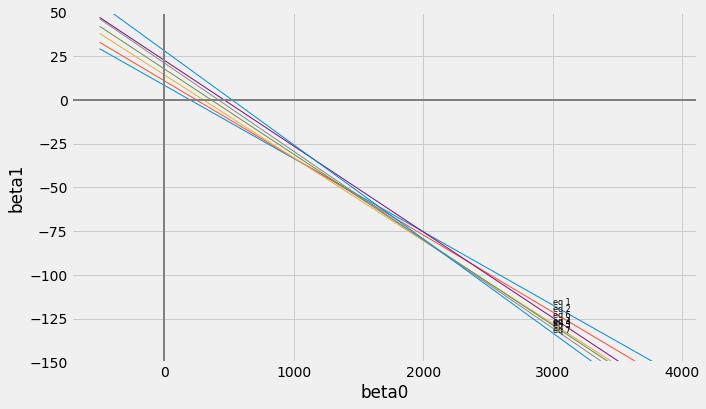

In [6]:
b0 = np.arange(-500,4000, 100)

for i in range(7):
    b1 = (price[i] - b0)/kmpl[i]
    plt.plot(b0, b1, linewidth = 1)
    plt.text(b0[-10], b1[-10], 'eq %s'% (i + 1), fontsize = 8 )

plt.axhline(0, color='grey', linewidth=2)
plt.axvline(0, color='grey', linewidth=2)

plt.xlabel('beta0')
plt.ylabel('beta1')

plt.ylim(-150,50)

Now we don't have an exact solution. But can see the $\beta_{0} $ is around 1600 and $ \beta_{1} $ is around -60. So one possible line is 

$$ price = 1600 - 60 * kmpl $$

But we can clearly see that this is probably not the best possible line!!

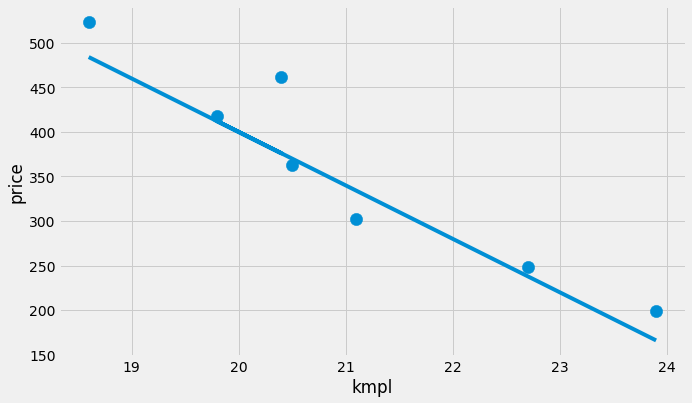

In [7]:
beta_0 = 1600 
beta_1 = -60
plt.scatter(kmpl, price, s = 150)
plt.xlabel('kmpl')
plt.ylabel('price')
y = beta_0 + beta_1 * kmpl
plt.plot(kmpl, y, '-')

## Adding Error Term

The linear relationship hence needs to be modeled through a error variable $\epsilon_{i}$  — an unobserved random variable that adds noise to the linear relationship between the target variable and input variable.

If we have `p` input variables then,

$$ y_{i} = \beta_{0} + \sum_{i=1}^p \beta_{i} x_{i} + \epsilon_{i}  $$

We can add the $x_{0} = 1 $ in the equation:

$$ y_{i} = \sum_{i=0}^p \beta_{i} x_{i} + \epsilon_{i} $$

$$ y_{i} = x_{i}^T \beta_{i} + \epsilon_{i} $$




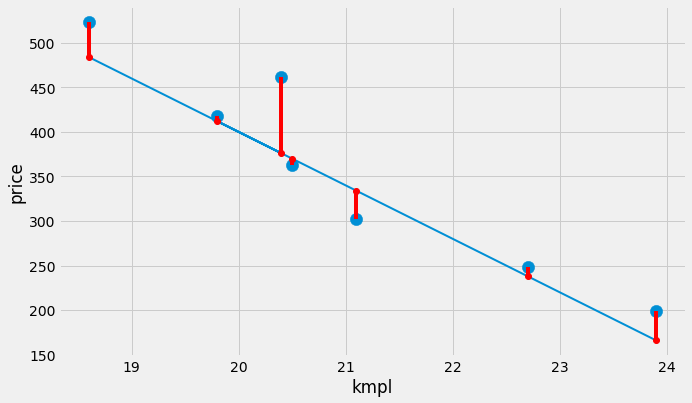

In [8]:
plt.scatter(kmpl, price, s = 150)
plt.xlabel('kmpl')
plt.ylabel('price')
y = 1600 - 60 * kmpl
yerrL = y - price
yerrB = y - y
plt.errorbar(kmpl,y, fmt = 'o', yerr= [yerrL, yerrB], c= 'r')
plt.plot(kmpl, y,linewidth = 2)

## Represent Matrix Way

If we write this in matrix form 

$$ y = X\beta + \epsilon $$

$$ \text{where} ~~~~  X = \begin{bmatrix} - x_{1}^T- \\ - x_{2}^T- \\ ... \\ - x_{n}^T-  \end{bmatrix} ~~ \text{,} ~~ y = \begin{bmatrix} y_{1} \\ y_{2} \\ ... \\ y_{n} \end{bmatrix} ~~ \text{and} ~~ \epsilon = \begin{bmatrix} \epsilon_{1} \\ \epsilon_{2} \\ ... \\ \epsilon_{n} \end{bmatrix} $$

For our specific example, the matrix looks like:

$$ \begin{bmatrix}199 \\ 248 \\ 302 \\ 363 \\ 418 \\ 462 \\ 523 \end{bmatrix} = \begin{bmatrix} 1 & 23.9 \\ 1 & 22.7 \\ 1 & 21.1 \\ 1 & 20.5 \\ 1 & 19.8 \\ 1 & 20.4 \\ 1 & 18.6  \end{bmatrix}  \begin{bmatrix}
\beta_{0} \\ \beta_{1} \end{bmatrix} +  \begin{bmatrix} \epsilon_{1} \\ \epsilon_{2} \\ \epsilon_{3} \\ \epsilon_{4} \\ \epsilon_{5} \\ \epsilon_{6} \\ \epsilon_{7}  \end{bmatrix} $$



## Minimize Error - Ordinary Least Square


The error we will aim to minimize is the squared error:

$$ E(\beta)= \frac {1}{n} \sum _{i=1}^{n}(\epsilon_{i})^2 $$

This is why this technique is called **Ordinary Least Square** (OLS) regression

$$ E(\beta)= \frac {1}{n} \sum _{i=1}^{n}(y_{i}-x_{i}^{T}\beta)^{2}  $$

which in matrix way is equal to: 

$$ E(\beta)=  \frac {1}{n} (y-X\beta)^{T}(y-X\beta) $$

$$ E(\beta)=   \frac {1}{n} {||y - X\beta||}^2 $$

To get the minimum for this error function, we need to differentiate by $\beta^T$

$$ \nabla E(\beta) = 0 $$

$$ \nabla E(\beta) ={\frac {dE(\beta)}{d\beta^T}} =  {\frac {d}{d\beta^T}}{\bigg (}{ \frac {1}{n} ||y - X\beta||}^2{\bigg )} = 0 $$

$$ \nabla E(\beta) =  {\frac {d}{d\beta^T}}{\bigg (}{ \frac {1}{n} (y-X\beta)^{T}(y-X\beta)}{\bigg )} = 0 $$

$$ \nabla E(\beta)=  \frac {2}{n} X^T(X\beta−y) = 0 $$

$$ X^T X\beta = X^T y $$

So the solution to OLS:

$$ \beta = X^†y ~~ \text{where} ~~ X^† = (X^T X)^{−1} X^T $$

$$X^† ~~ \text{is the pseudo inverse of} ~~ X $$





## Calculate Pseudo Inverse

$$ X^† = (X^T X)^{−1} X^T $$

$X^† $ is the pseudo inverse of $ X $ has good properties

$$ X^† = \left( \begin{matrix} ~ \\
                            \begin{bmatrix}  ~ \\ p + 1 \times n \\ ~  \end{bmatrix} 
                            \begin{bmatrix}  ~ \\ n \times p + 1 \\ ~  \end{bmatrix} 
                             \\ ~ 
                  \end{matrix}
          \right)^{-1} 
          \begin{bmatrix} ~ \\  (p + 1 \times n) \\ ~ \end{bmatrix}$$

$$ X^† = \left( \begin{matrix} ~ \\
                            \begin{bmatrix}  ~ \\ p + 1 \times p + 1 \\ ~  \end{bmatrix} 
                             \\ ~ 
                  \end{matrix}
          \right)^{-1} 
          \begin{bmatrix} ~ \\  (p + 1 \times n) \\ ~ \end{bmatrix}$$


$$ X^† = \begin{bmatrix} ~ \\  (p + 1 \times n) \\ ~ \end{bmatrix}$$


$$ X^†_{p + 1 \times n} = {(X^T_{p + 1 \times n} ~ X_{n \times p+1})}^{-1} ~ X^T_{p + 1 \times n}$$



In [9]:
n = 7

In [10]:
x0 = np.ones(n)
x0

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [11]:
x1 = kmpl
x1

array([ 23.9,  22.7,  21.1,  20.5,  19.8,  20.4,  18.6])

In [12]:
# Create the X matrix
X = np.c_[x0, x1]
X = np.asmatrix(X)
X

matrix([[  1. ,  23.9],
        [  1. ,  22.7],
        [  1. ,  21.1],
        [  1. ,  20.5],
        [  1. ,  19.8],
        [  1. ,  20.4],
        [  1. ,  18.6]])

In [13]:
# Create the y matrix
y = np.asmatrix(price.reshape(-1,1))
y

matrix([[199],
        [248],
        [302],
        [363],
        [418],
        [462],
        [523]])

In [14]:
y.shape

(7, 1)

In [15]:
X_T = np.transpose(X)
X_T

matrix([[  1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ],
        [ 23.9,  22.7,  21.1,  20.5,  19.8,  20.4,  18.6]])

In [16]:
X_T * X

matrix([[    7.  ,   147.  ],
        [  147.  ,  3106.12]])

In [17]:
X_pseudo = np.linalg.inv(X_T * X) * X_T
X_pseudo

matrix([[-3.0422893 , -1.72429767,  0.03302451,  0.69202032,  1.46084877,
          0.80185296,  2.77884041],
        [ 0.15167364,  0.08891213,  0.00523013, -0.02615063, -0.06276151,
         -0.03138075, -0.12552301]])

In [18]:
beta = X_pseudo * y
beta

matrix([[ 1662.55977286],
        [  -62.06066946]])

## OLS Solution

Hence we now know that the best-fit line is $\beta_0 = 1662 $ and $\beta_1 = -62$

$$ price = 1662 - 62 * kmpl $$



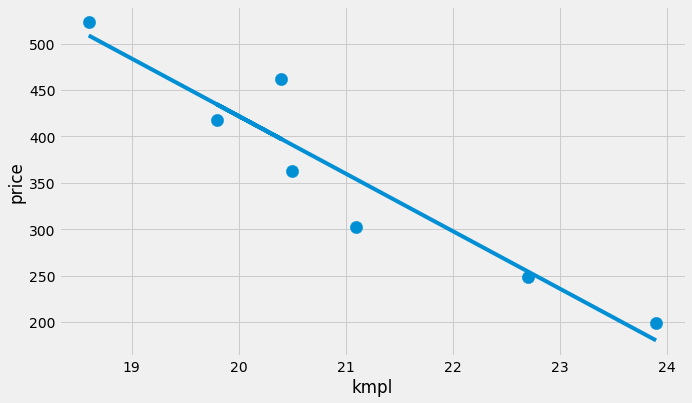

In [22]:
beta_0 = 1662 
beta_1 = -62
plt.scatter(kmpl, price, s = 150)
plt.xlabel('kmpl')
plt.ylabel('price')
y = beta_0 + beta_1 * kmpl
plt.plot(kmpl, y, '-')

## Exercise 1

We had price ('000 INR), mileage (kmpl) and now we have one more input variable - horsepower (bhp) for the 7 cars

```
price = [199 , 248 , 302 , 363 , 418 , 462 , 523 ]
kmpl  = [23.9, 22.7, 21.1, 20.5, 19.8, 20.4, 18.6]
bhp   = [38  , 47  , 55  , 67  , 68  , 83  , 82  ] 
```
We want to predict the value of `price`, given the variable `kmpl` and `bhp`

In [19]:
bhp = np.array([38, 47, 55, 67, 68, 83, 82])

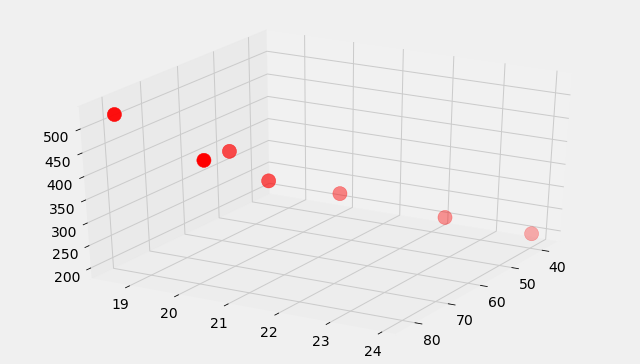

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(bhp, kmpl, price, c='r', marker='o', s = 200)
ax.view_init(azim=30)

So a linear relationship can be written as:

$$ price = \beta_{0} + \beta_{1} kmpl + \beta_{2} bhp $$

We have added an intercept to the equation, so that the plane does not need to pass through zero

So we are trying to solve these n = 7 equations with, p = 3

$$ 199 = \beta_{0} + \beta_{1} 23.9 + \beta_{2} 38 + \epsilon_{1} ~~~~ \text{(eq 1)} $$
$$ 248 = \beta_{0} + \beta_{1} 22.7 + \beta_{2} 47 + \epsilon_{2} ~~~~ \text{(eq 2)} $$
$$ 302 = \beta_{0} + \beta_{1} 21.1 + \beta_{2} 55 + \epsilon_{3} ~~~~ \text{(eq 3)} $$
$$ 363 = \beta_{0} + \beta_{1} 20.5 + \beta_{2} 67 + \epsilon_{4} ~~~~ \text{(eq 4)} $$
$$ 418 = \beta_{0} + \beta_{1} 19.8 + \beta_{2} 68 + \epsilon_{5} ~~~~ \text{(eq 5)} $$
$$ 462 = \beta_{0} + \beta_{1} 20.4 + \beta_{2} 83 + \epsilon_{6} ~~~~ \text{(eq 6)} $$
$$ 523 = \beta_{0} + \beta_{1} 18.6 + \beta_{2} 82 + \epsilon_{7} ~~~~ \text{(eq 7)} $$

or in matrix form - we can write it as

$$ \begin{bmatrix}199 \\ 248 \\ 302 \\ 363 \\ 418 \\ 462 \\ 523 \end{bmatrix} = \begin{bmatrix} 1 & 23.9 & 38 \\ 1 & 22.7 & 47 \\ 1 & 21.1 & 55 \\ 1 & 20.5 & 67 \\ 1 & 19.8 & 68 \\ 1 & 20.4 & 83 \\ 1 & 18.6 & 82  \end{bmatrix}  \begin{bmatrix}\beta_{0} \\ \beta_{1} \\ \beta_{2}\end{bmatrix} + \begin{bmatrix} \epsilon_{1} \\ \epsilon_{2} \\ \epsilon_{3} \\ \epsilon_{4} \\ \epsilon_{5} \\ \epsilon_{6} \\ \epsilon_{7}  \end{bmatrix}$$



Develop the $X$ matrix for this problem?

Develop the $y$ matrix for this problem?

Calculate the pseudo inverse of $X$.

Find the $\beta$ for the best-fit plane.

Plot the `price`, `kmpl` and `bhp` and the best-fit plane.

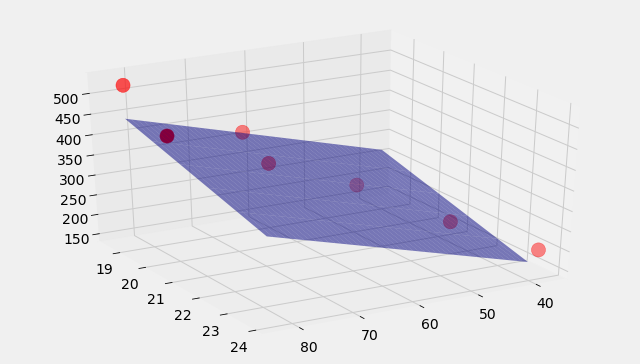

In [25]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(bhp, kmpl, price, c='r', marker='o', s = 200)

xrange = np.arange(min(bhp), max(bhp), 1)
yrange = np.arange(min(kmpl), max(kmpl), 1)
x, y = np.meshgrid(xrange, yrange)
z = 524 - 22 * y + 4 * x
ax.plot_surface(x, y, z, color ='blue', alpha = 0.5)
ax.view_init(azim=60)

## Using a package: sklearn

Run the Ordinary Least Square using the package sklearn

In [37]:
import pandas as pd
df = pd.read_csv("data/cars_sample.csv")

In [38]:
from sklearn import linear_model

In [39]:
y = df.price

In [40]:
X = df[['kmpl', 'bhp']]

In [41]:
model_sklearn = linear_model.LinearRegression()

In [42]:
model_sklearn.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
model_sklearn.coef_

array([-21.72670412,   4.64289836])

In [44]:
model_sklearn.intercept_

523.70717536052416

In [45]:
model_sklearn_norm = linear_model.LinearRegression(normalize = True)

In [46]:
model_sklearn_norm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [47]:
model_sklearn_norm.coef_

array([-21.72670412,   4.64289836])

In [48]:
model_sklearn_norm.intercept_

523.70717536052416

## Non Linear Transformation

What happens when we do Non-Linear transforms to the features?

What if we want to predict $price$ based on $kmpl$, $bhp$, $kmpl^2$ and $bhp / kmpl$

The think to remember is that non-linear transforms of the features does not impact the Linear Regression. Because the linear relationship is really about $\beta $ and not the features.

We can be write this  as:

$$ price = \beta_{0} + \beta_{1} kmpl + \beta_{2} bhp + \beta_{3} kmpl^2 + \beta_{4} bhp/kmpl $$

In [49]:
df['kmpl2'] = np.power(df.kmpl,2)

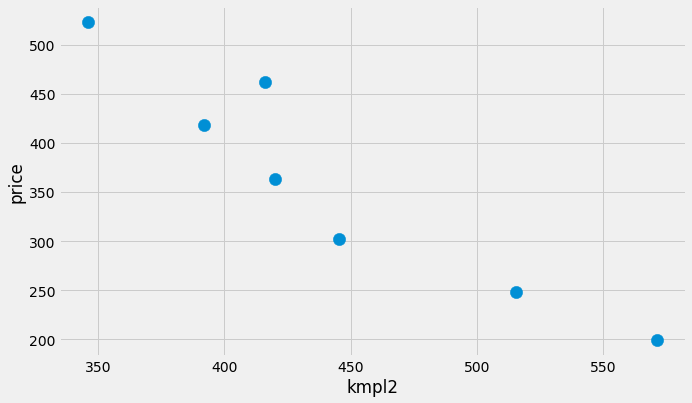

In [50]:
plt.scatter(df.kmpl2, df.price, s = 150)
plt.xlabel('kmpl2')
plt.ylabel('price')

In [51]:
df['bhp_kmpl'] = np.divide(df.bhp, df.kmpl)

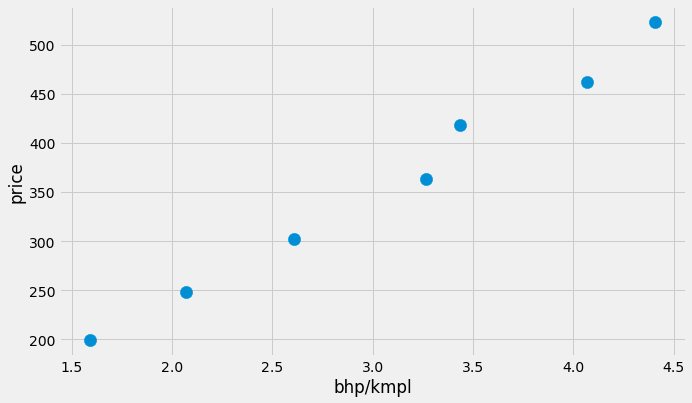

In [52]:
plt.scatter(df.bhp_kmpl, df.price, s = 150)
plt.xlabel('bhp/kmpl')
plt.ylabel('price')

In [53]:
df

,brand,model,price,kmpl,bhp,type,kmpl2,bhp_kmpl
0,Tata,Nano,199,23.9,38,Hatchback,571.21,1.589958
1,Suzuki,Alto 800,248,22.7,47,Hatchback,515.29,2.070485
2,Hyundai,EON,302,21.1,55,Hatchback,445.21,2.606635
3,Suzuki,Wagon-R,363,20.5,67,Hatchback,420.25,3.268293
4,Hyundai,i10,418,19.8,68,Hatchback,392.04,3.434343
5,Suzuki,Swift,462,20.4,83,Hatchback,416.16,4.068627
6,Hyundai,i20,523,18.6,82,Hatchback,345.96,4.408602


## Exercise 2

Run a linear regeression:
$$ price = \beta_{0} + \beta_{1} kmpl + \beta_{2} bhp + \beta_{2} kmpl^2 + \beta_{2} bhp/kmpl $$

Using Pseudo-Inverse Matrix:

Using sklearn package: